In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import pandas as pd
import numpy as np
import pickle

from regression import transform_vars_for_regression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from prediction import ModelEvaluator, load_rf_and_xgb_models, prepare_experiment_dfs
from shapley import combine_categories_SHAP_all, load_shapval_results

# Plot SHAP/Shapley lineplots and Chloropleths

## Load precomputed df

In [4]:
df_crawled, df_reg, df_editreg, df_class = prepare_experiment_dfs('events/new/processed_0_manually_with_wikiviews_allcorr.csv')

In [5]:
models, model_eval = load_rf_and_xgb_models(df_class, df_reg, df_editreg)

In [8]:
# we use acv shapvals here. Results do not differ for other results
shap_vals, shap_vals_acv, shap_vals_acv_int = load_shapval_results('shap/1000/ACV_SHAP_SHAPINT_noreg.pkl')
shap_vals = combine_categories_SHAP_all(shap_vals)

{'code_en': 4, 'cat_disaster': 4}
{'code_en': 4, 'cat_disaster': 4}
{'code_en': 4, 'cat_disaster': 4}
{'code_en': 4, 'cat_disaster': 4}


# Plot lineplots

In [10]:
from plot_regression import plot_shap_lineplot_for_model
from plot_regression import colorblind_tol4, colorblind_tol8, colorblind_tol7
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': 'Noto Sans'})

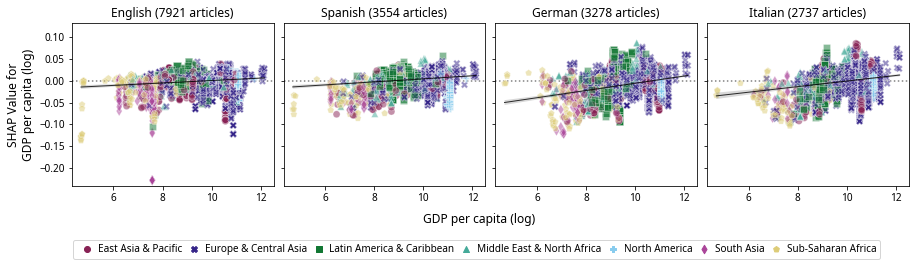

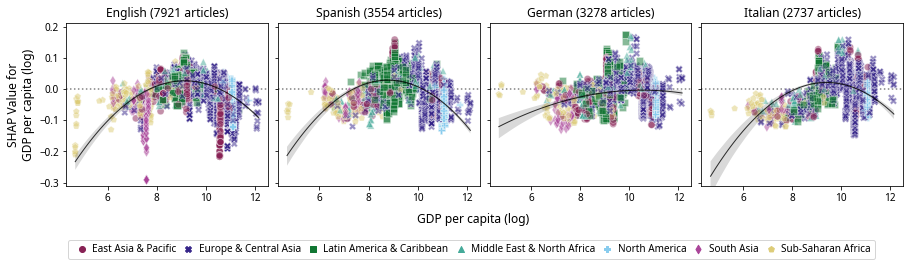

In [13]:
fig_viewed = plot_shap_lineplot_for_model(shap_vals, model_eval, 'viewed', func_order=1, regtype='poly_force')
fig_edited = plot_shap_lineplot_for_model(shap_vals, model_eval, 'edited', func_order=2, regtype='poly_force')

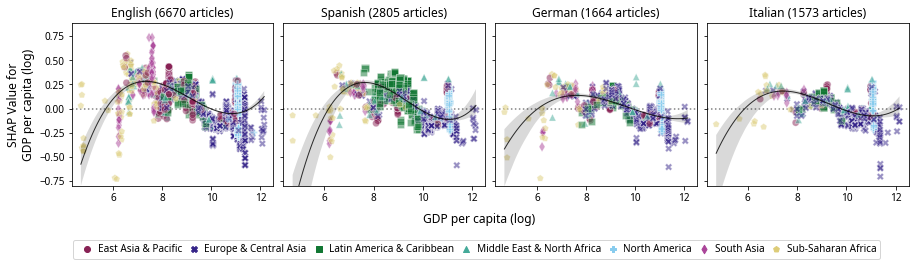

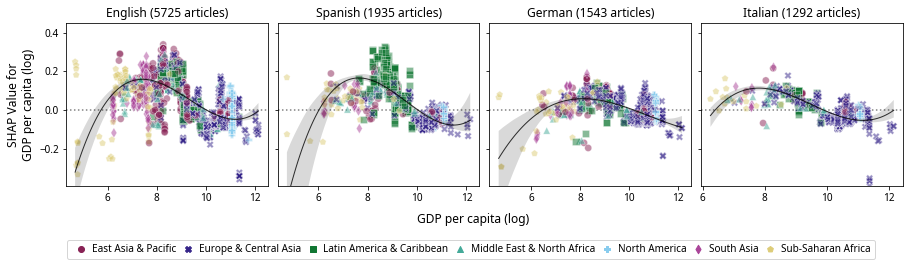

In [251]:
fig_views = plot_shap_lineplot_for_model(shap_vals, model_eval, 'views', func_order=3, regtype='poly_force')
fig_edits = plot_shap_lineplot_for_model(shap_vals, model_eval, 'edits', func_order=3, regtype='poly_force')

### Plot Chloropleth Plots by Region and Country across all Wikis

In [17]:
from plot_regression import plot_chloropleth, build_chloropleths
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.family': 'sans-serif',
                     'font.sans-serif': 'Noto Sans'})

Plot viewed by country
Plot viewed by gni_region
Plot edited by country
Plot edited by gni_region
Plot views by country
Plot views by gni_region
Plot edits by country
Plot edits by gni_region


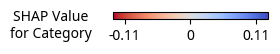

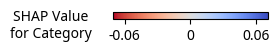

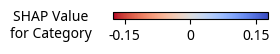

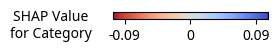

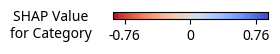

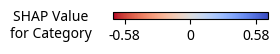

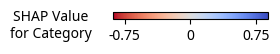

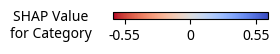

In [29]:
# Plot shap value SHAP of category (in general) by <field> (viewed/edited, views/edits) and <group> (either region or country).
figs_chloro = {}
for field in ['viewed', 'edited', 'views', 'edits']:
    for group_field, group_field_color in [('country', 'name_en'), ('gni_region', 'region_wb')]:
        print(f'Plot {field} by {group_field}')
        figs_chloro[(field, group_field)] =  build_chloropleths(shap_vals, model_eval, field, column = 'cat_sports', group_col = 'cat', color_data = group_field, color_map = group_field_color, cb_horizontal=True)